#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Data Understanding and Data Preparation`

#### Group:
- `Miguel Matos - 20221925`
- `Nuno Leandro - 20221861`
- `Patrícia Bezerra - 20221907`
- `Rita Silva - 20221920`
- `Vasco Capão - 20221906`

#### <font color='#BFD72F'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [0. Imports](#p0)
- [1. Data Understanding](#p1)
    - [1.1. Restaurants Dataset](#p1-1)
    - [1.2 Reviews Dataset](#p1-2)
- [2. Datasets Integration](#p2)
- [3. Reviews](#p3)
    - [3.1 Word Counts](#p3-1)
        - [3.1.1 Bag of Words (BoW)](#p3-1-1)
        - [3.1.2 Term Frequency-Inverse Document Frequency (TF-IDF)](#p3-1-2)
    - [3.2 Word Clouds](#p3-2)
        - [3.2.1 Bag of Words (BoW)](#p3-2-1)
        - [3.2.2 Term Frequency-Inverse Document Frequency (TF-IDF)](#p3-2-2)
    - [3.4 Co-ocurrence Matrix](#p3-4)

- [4. General Data Preparation](#p4)
- [5. Conclusion](#p5)

<font color='#BFD72F' size=6>0. Imports</font> <a class="anchor" id="p0"></a>

In [47]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
from utils.functions import *
from utils.pipeline_project import *

<font color='#BFD72F' size=7>1. Data Understanding</font> <a class="anchor" id="p1"></a>
  
[Back to TOC](#toc)

In [3]:
# Load the restaurants dataset
restaurants = pd.read_csv("Data/105_restaurants.csv")

# Load the reviews dataset
reviews = pd.read_csv("Data/10k_reviews.csv")

<font color='#BFD72F' size=6>1.1 Restaurants Dataset</font> <a class="anchor" id="p1-1"></a>
  
[Back to TOC](#toc)

The 'Cuisines' column in this dataset will be the target for the Multilabel Classification model.

In [4]:
restaurants.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
# Display 'restaurants' DataFrame info and checks for missing values
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


 As shown, the restaurants dataset contains some missing values. Specifically, there are missing entries in the 'Collections' and 'Timings' columns.

In [6]:
# This transformation is necessary for being able to plot the variable "Cost" correctly.
restaurants["Cost"] = restaurants["Cost"].apply(lambda x: str(x).replace(',', ''))
restaurants["Cost"] = restaurants["Cost"].astype(int)

In [7]:
# Display the summary statistics for the categorical columns
restaurants.describe(include = "object")

,Name,Links,Collections,Cuisines,Timings
count,105,105,51,105,104
unique,105,105,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,4,4,6


By observing the summary statistics of the categorical columns, it is possible to conclude that there are 92 different types of cuisines, with North Indian and Chinese being the most common.

In [8]:
# Display the summary statistics for the numerical columns
restaurants.describe(exclude = "object")

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


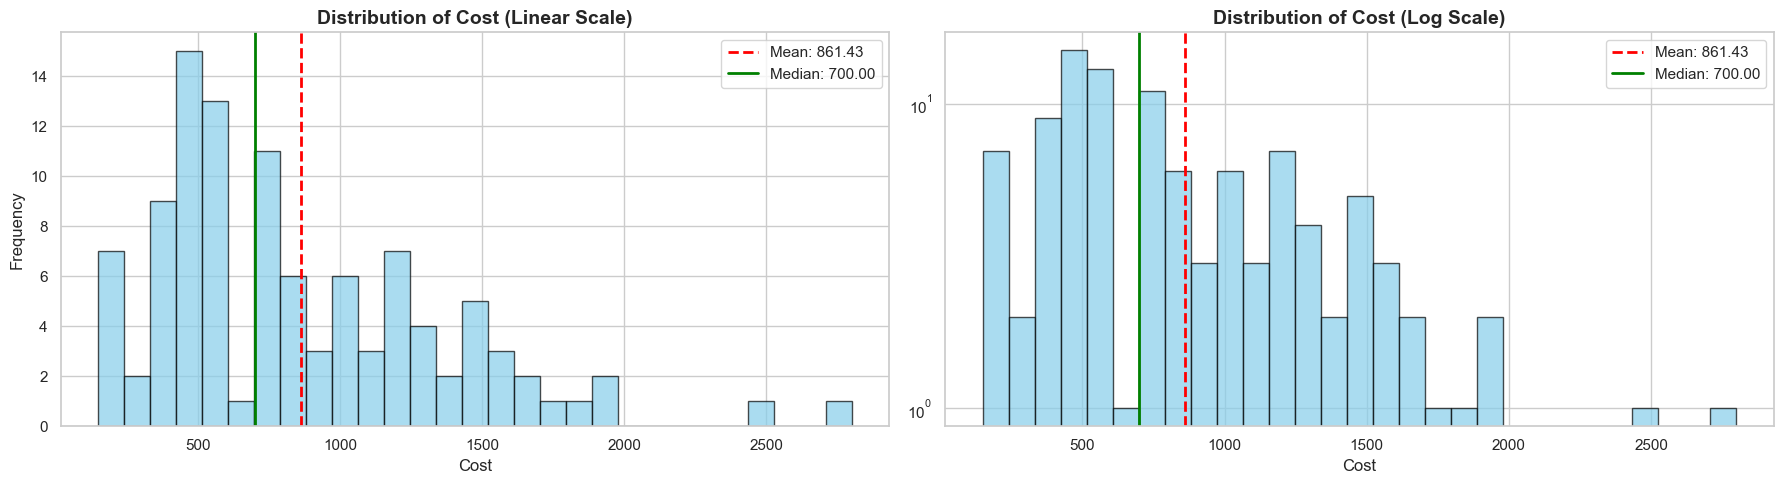

In [9]:
plotter_1(restaurants, "Cost")

By analyzing the graphs, we can conclude that the majority of restaurant costs are concentrated at lower prices, with a few high-cost outliers pushing the mean (861.43) above the median (700.00). While the linear scale highlights this skewness, the logarithmic scale compresses the range, making the distribution of values appear clearer and more balanced.

<font color='#BFD72F' size=6>1.2 Reviews Dataset</font> <a class="anchor" id="p1-2"></a>
  
[Back to TOC](#toc)

The 'Rating' column in this dataset will be used as the target for the Sentiment Analysis model.

In [10]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [11]:
# Display 10 unique values of each variables
display_unique_values(reviews)

Column: Restaurant
First 10 unique values: ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone']

Column: Reviewer
First 10 unique values: ['Rusha Chakraborty' 'Anusha Tirumalaneedi' 'Ashok Shekhawat'
 'Swapnil Sarkar' 'Dileep' 'Nagabhavani K' 'Jamuna Bhuwalka' 'Sandhya S'
 'Akash Thorat' 'Smarak Patnaik']

Column: Review
First 10 unique values: ['The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.'
 'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service'
 'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Past

#### Basic Dataset Cleaning

In [12]:
# Rename the column "Restaurant" to "Name"
reviews.rename(columns={"Restaurant": "Name"}, inplace=True)

# Filter out rows where the "Rating" column has the value "Like"
reviews = reviews[reviews["Rating"] != "Like"]

# Apply the 'only_numbers' function to extract numbers from the "Metadata" column
reviews["Metadata"] = reviews["Metadata"].apply(only_numbers)

# Create a new column "Nº_Reviews" by applying the 'Nº_reviews' function to the "Metadata" column
reviews["Nº_Reviews"] = reviews["Metadata"].apply(Nº_reviews)

# Create a new column "Nº_Followers" by applying the 'Nº_followers' function to the "Metadata" column
reviews["Nº_Followers"] = reviews["Metadata"].apply(Nº_followers)

# Drop the "Metadata" column as it is no longer needed
reviews.drop("Metadata", axis=1, inplace=True)

# Convert the "Nº_Reviews" column to numeric, coercing invalid values to NaN
reviews['Nº_Reviews'] = pd.to_numeric(reviews['Nº_Reviews'], errors='coerce')

# Convert the "Nº_Followers" column to numeric, coercing invalid values to NaN
reviews['Nº_Followers'] = pd.to_numeric(reviews['Nº_Followers'], errors='coerce')

# Convert the "Rating" column to float type
reviews["Rating"] = reviews["Rating"].astype(float)

In [13]:
reviews.head()

,Name,Reviewer,Review,Rating,Time,Pictures,Nº_Reviews,Nº_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3.0,2.0


In [14]:
# Displays 'reviews' DataFrame info and checks for missing values
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          9999 non-null   object 
 1   Reviewer      9961 non-null   object 
 2   Review        9954 non-null   object 
 3   Rating        9961 non-null   float64
 4   Time          9961 non-null   object 
 5   Pictures      9999 non-null   int64  
 6   Nº_Reviews    9961 non-null   float64
 7   Nº_Followers  9961 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 703.1+ KB


As shown, the reviews dataset contains some missing values, specifically in the 'Reviewer,' 'Review,' 'Rating,' 'Time,' 'Nº_Reviews,' and 'Nº_Followers' columns.

In [15]:
# Display the summary statistics for the categorical columns
reviews.describe(include= "object")

,Name,Reviewer,Review,Time
count,9999,9961,9954,9961
unique,100,7446,9363,9781
top,Beyond Flavours,Ankita,good,7/29/2018 20:34
freq,100,13,237,3


This output shows that 7,446 different individuals have reviewed the restaurants. Additionally, the restaurant with the most reviews is 'Beyond Flavours,' with 100 reviews.

In [16]:
# Display the summary statistics for the numerical columns
reviews.describe()

,Rating,Pictures,Nº_Reviews,Nº_Followers
count,9961.000000,9999.000000,9961.000000,9961.000000
mean,3.601044,0.748575,23.992069,163.293344
std,1.483461,2.570508,50.617425,619.905552
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000
50%,4.000000,0.000000,4.000000,7.000000
75%,5.000000,0.000000,22.000000,63.000000
max,5.000000,64.000000,1031.000000,13410.000000


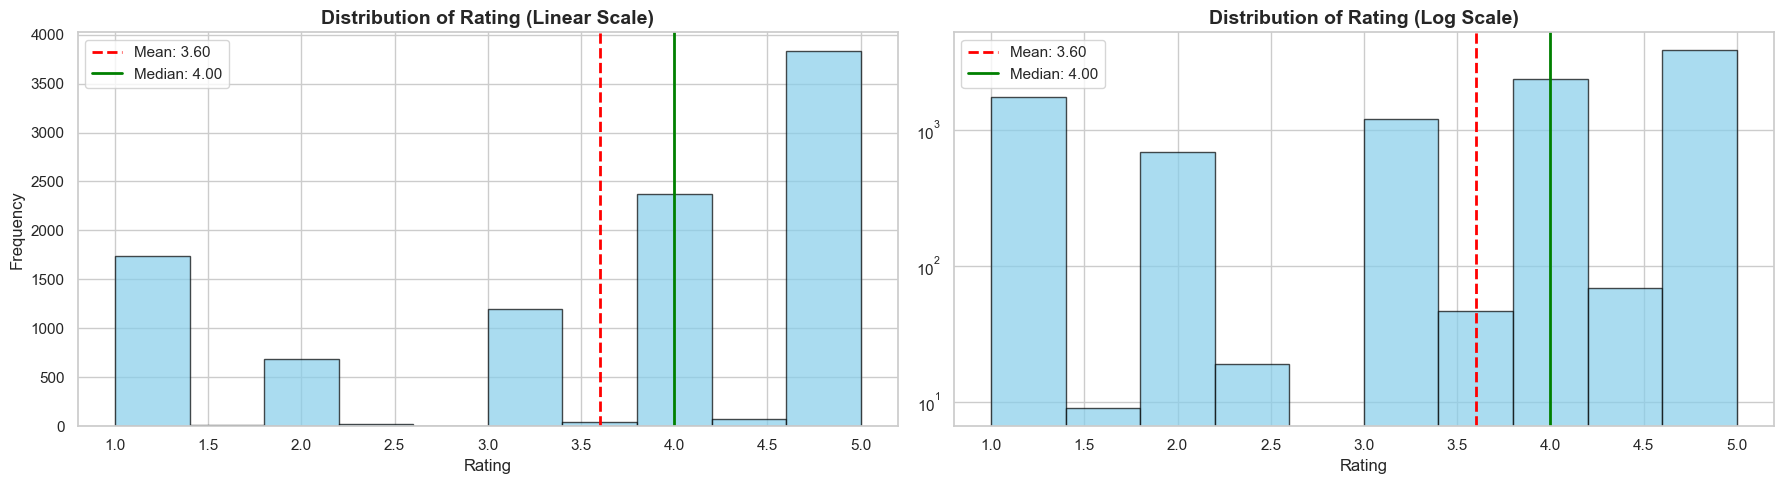

In [17]:
plotter_1(reviews,"Rating")

The graphics illustrate the distribution of ratings using both a linear scale (left graphic) and a logarithmic scale (right graphic).
In the left plot, the most frequent ratings are 4.0 and 5.0, with a notable peak around 1.0 as well. The mean rating, represented by the red dashed line, is approximately 3.6, while the median, indicated by the green solid line, is 4.0. This discrepancy suggests a slight right skew in the distribution.
The right plot provides a clearer view of the lower ratings, showing that while ratings around 2.0 and 3.0 are less common, they still contribute significantly to the overall distribution.
Overall, this analysis indicates that users tend to express either strong dissatisfaction (rating 1.0) or high satisfaction (ratings 4.0–5.0).

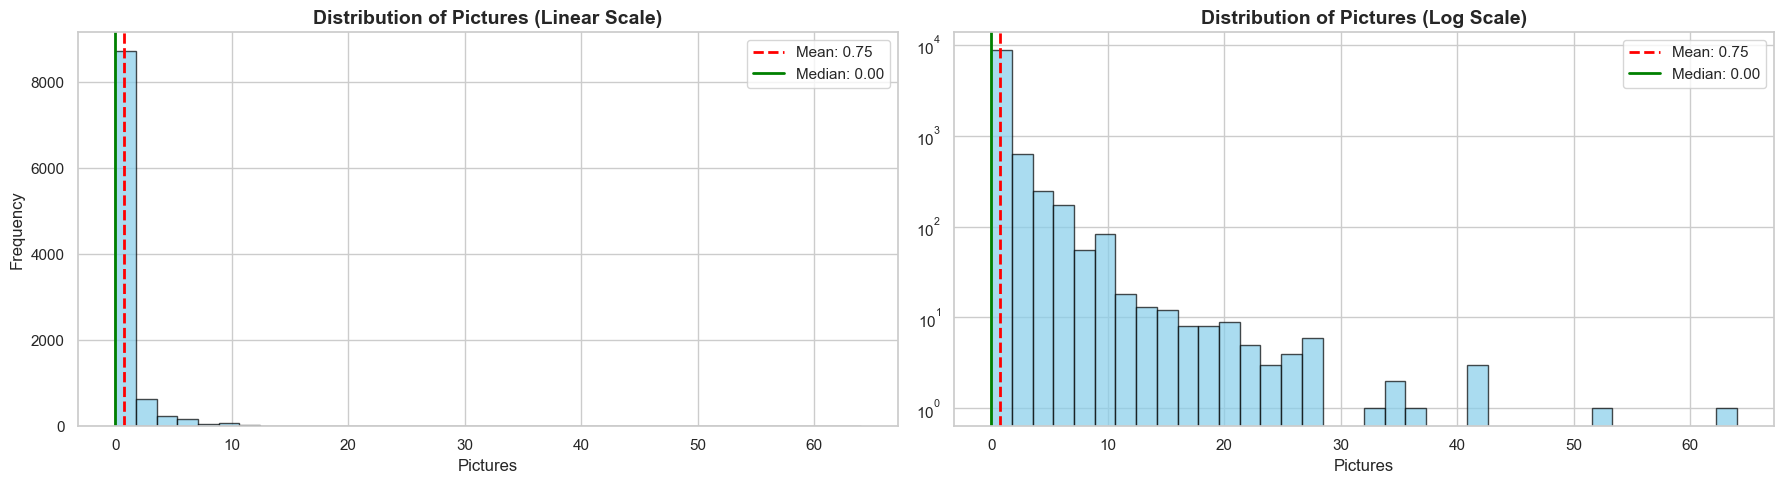

In [18]:
plotter_1(reviews,"Pictures")

In the left graphic, it is possible to observe that the majority of reviews do not include pictures. However, the log-scale plot highlights that, while most users do not attach pictures, a few highly engaged users contribute reviews with a significantly larger number of pictures.

Given that some reviews contain a large number of pictures, we will examine how many followers the users who include more images in their reviews have.

In [19]:
reviews[reviews["Pictures"] > 30].sort_values(by="Pictures", ascending = False)

,Name,Reviewer,Review,Rating,Time,Pictures,Nº_Reviews,Nº_Followers
9043,Arena Eleven,Anvith Devulapally,"Rating: 3.5\n\nReplacing Serafina, Arena Eleve...",4.0,4/22/2019 18:23,64,124.0,1035.0
3148,Pista House,Food Nawabs,An amazing pocket friendly place where they se...,4.0,10/8/2018 15:15,52,130.0,5532.0
4697,Ulavacharu,Food Nawabs,"India is a food nation, every 50 kms you trave...",4.0,10/5/2018 8:56,42,130.0,5532.0
6080,PourHouse7,Akshith,I visited this place along with my friends tod...,5.0,2/16/2019 20:40,42,54.0,63.0
3998,Deli 9 Bistro,Food Nawabs,"It's all about Food, a small and a ambience fi...",4.0,10/10/2018 13:52,41,130.0,5532.0
6066,PourHouse7,Hydfoodiesisters,Follow our Instagram page - hydfoodiesisters 👭...,5.0,3/3/2019 14:53,37,30.0,279.0
7375,Driven Cafe,ChicLifeByte,"If bikes, cars and coffee are your weaknesses ...",5.0,6/10/2018 9:48,34,151.0,2709.0
9222,Collage - Hyatt Hyderabad Gachibowli,Vijaya,"Amid the busy lanes of financial district, lie...",2.0,2/5/2019 14:42,34,207.0,927.0
9621,Hyderabadi Daawat,BeingHydFoodie,Follow My Instagram @BeingHydFoodie\n\nHyderab...,5.0,3/17/2019 13:06,32,137.0,1563.0


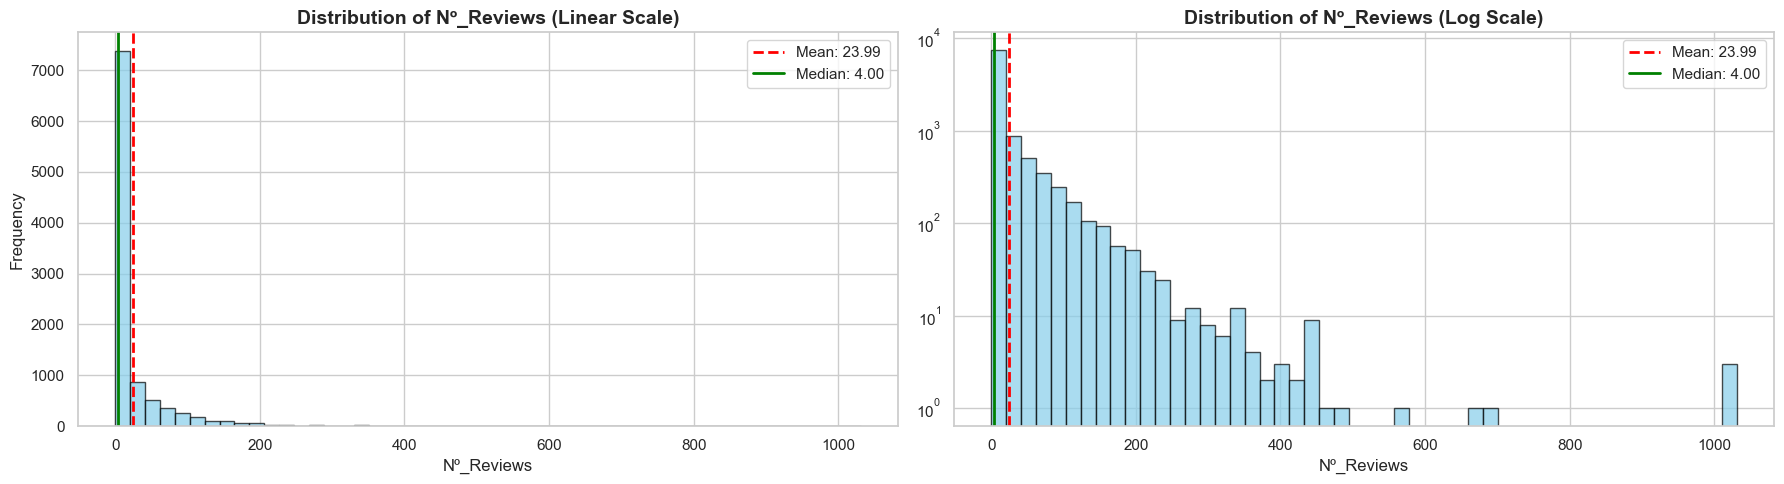

In [20]:
plotter_1(reviews,"Nº_Reviews")

These graphics illustrate the number of reviews per user. They show that most users contribute only a few reviews, indicating limited feedback. By analyzing the median value, we observe that at least half of the users have written four or fewer reviews. However, a small number of individuals have written a disproportionately large number of reviews.
Focusing on the right plot, we can see that while most users are clustered around low review counts, some have contributed hundreds or even over 1,000 reviews.

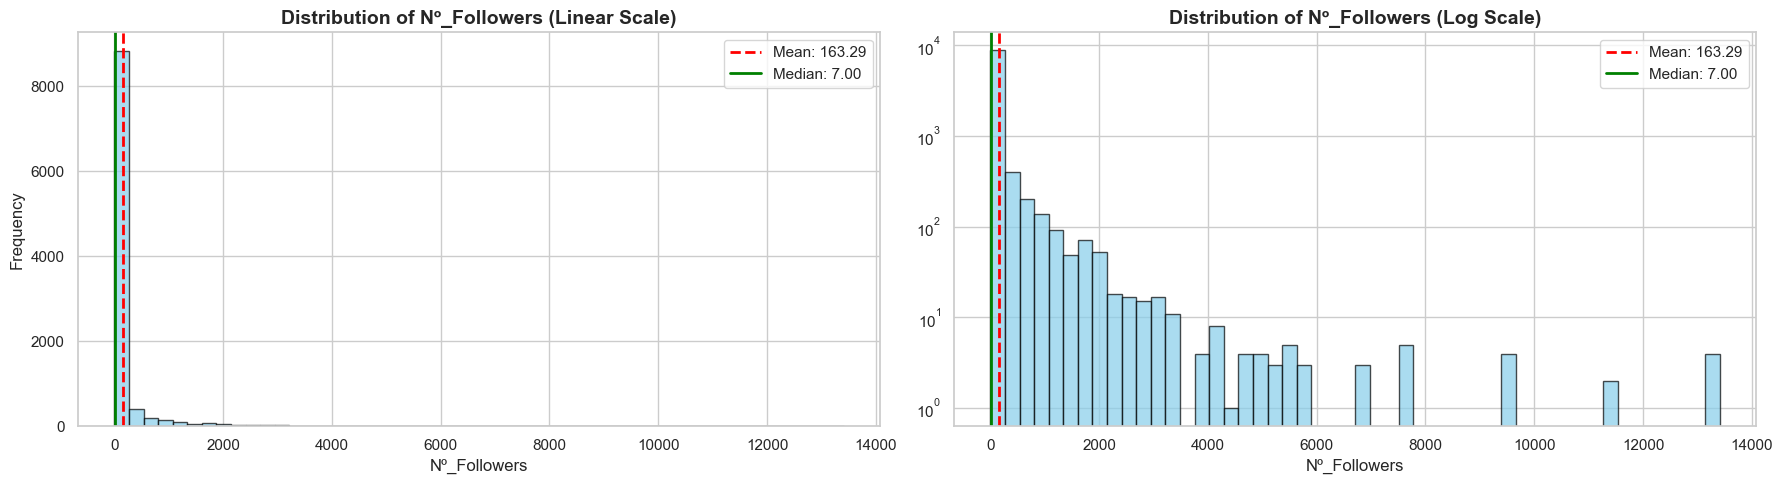

In [21]:
plotter_1(reviews,"Nº_Followers")

These plots highlight that the majority of individuals have a very low follower count. Additionally, the large gap between the mean (7.00) and the median (163.29) indicates the presence of extreme values or outliers with a high number of followers. In the left plot, we can see that most individuals fall within the lower follower count range, but a few users have more than 1,000 followers.

<font color='#BFD72F' size=7>2. Datasets Integration</font> <a class="anchor" id="p2"></a>

[Back to TOC](#toc)

In [22]:
# Merge 'Restaurants' and 'Reviews' datasets on 'Name' with an inner join
main_df= pd.merge(restaurants, reviews, on="Name", how="inner")

In [23]:
main_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Time,Pictures,Nº_Reviews,Nº_Followers
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1.0,2.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3.0,2.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2.0,3.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1.0,1.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3.0,2.0


In [24]:
# Display dataframe info and checks for missing values
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          9999 non-null   object 
 1   Links         9999 non-null   object 
 2   Cost          9999 non-null   int64  
 3   Collections   5000 non-null   object 
 4   Cuisines      9999 non-null   object 
 5   Timings       9899 non-null   object 
 6   Reviewer      9961 non-null   object 
 7   Review        9954 non-null   object 
 8   Rating        9961 non-null   float64
 9   Time          9961 non-null   object 
 10  Pictures      9999 non-null   int64  
 11  Nº_Reviews    9961 non-null   float64
 12  Nº_Followers  9961 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.7+ KB


The missing values correspond to those mentioned earlier.

<font color='#BFD72F' size=7>3. Reviews</font> <a class="anchor" id="p3"></a>

[Back to TOC](#toc)

As observed previously, the number of missing values in the 'Review' column is minimal, so to avoid introducing bias into future analyses, they will be deleted.

In [25]:
# Drop rows with missing 'Review' values
main_df.dropna(subset="Review", inplace= True)

In [26]:
# Display the summary statistics for the numerical columns
main_df.describe()

,Cost,Rating,Pictures,Nº_Reviews,Nº_Followers
count,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000
mean,871.830420,3.600261,0.751959,24.007937,163.407173
std,503.491402,1.483573,2.575819,50.631674,620.108637
min,150.000000,1.000000,0.000000,0.000000,0.000000
25%,500.000000,3.000000,0.000000,1.000000,1.000000
50%,700.000000,4.000000,0.000000,4.000000,7.000000
75%,1200.000000,5.000000,0.000000,22.000000,63.000000
max,2800.000000,5.000000,64.000000,1031.000000,13410.000000


In [27]:
# Display the summary statistics for the categorical columns
main_df.describe(include = "object")

,Name,Links,Collections,Cuisines,Timings,Reviewer,Review,Time
count,9954,9954,4962,9954,9854,9954,9954,9954
unique,100,100,42,89,74,7442,9363,9774
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM,Ankita,good,5/5/2019 22:39
freq,100,100,377,397,499,13,237,3


In [28]:
# Select the columns 'Name', 'Review', 'Rating', 'Cuisines'
main_df = main_df[["Name", "Review", "Rating", "Cuisines"]]

In [29]:
# Apply the main preprocessing pipeline to the 'Review' column and store the result in 'preproc_reviews'
preprocessor = pipeline_project.MainPipeline().main_pipeline
main_df["preproc_reviews"] = main_df["Review"].apply(lambda x: preprocessor(x))
main_df.head()

,Name,Review,Rating,Cuisines,preproc_reviews
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"Chinese, Continental, Kebab, European, South I...",ambience good food quite good saturday lunch c...
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"Chinese, Continental, Kebab, European, South I...",ambience good pleasant even service prompt foo...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"Chinese, Continental, Kebab, European, South I...",must try great food great ambience thnx servic...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0,"Chinese, Continental, Kebab, European, South I...",soumen da arun great guy behavior sincerety go...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0,"Chinese, Continental, Kebab, European, South I...",food order kodi drumstick basket mutton biryan...


In [30]:
# Display dataframe info, memory usage, and check for missing values
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9954 non-null   object 
 1   Review           9954 non-null   object 
 2   Rating           9954 non-null   float64
 3   Cuisines         9954 non-null   object 
 4   preproc_reviews  9954 non-null   object 
dtypes: float64(1), object(4)
memory usage: 466.6+ KB


<font color='#BFD72F' size=6>3.1 Word Counts</font> <a class="anchor" id="p3-1"></a>
  
[Back to TOC](#toc)

In [31]:
main_df.head()

,Name,Review,Rating,Cuisines,preproc_reviews
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"Chinese, Continental, Kebab, European, South I...",ambience good food quite good saturday lunch c...
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"Chinese, Continental, Kebab, European, South I...",ambience good pleasant even service prompt foo...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"Chinese, Continental, Kebab, European, South I...",must try great food great ambience thnx servic...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0,"Chinese, Continental, Kebab, European, South I...",soumen da arun great guy behavior sincerety go...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0,"Chinese, Continental, Kebab, European, South I...",food order kodi drumstick basket mutton biryan...


In [32]:
# Define the corpus
corpus = main_df[['preproc_reviews','Rating']].copy()
corpus_positive_ratings =  main_df[['preproc_reviews','Rating']][main_df['Rating'] > 3].copy()
corpus_neutral_ratings =  main_df[['preproc_reviews','Rating']][main_df['Rating'] == 3].copy()
corpus_negative_ratings =  main_df[['preproc_reviews','Rating']][main_df['Rating'] < 3].copy()

<font color='#BFD72F' size=5>3.1.1 Bag of Words (BoW)</font> <a class="anchor" id="p3-1-1"></a>

[Back to TOC](#toc)


The BoW model is used to transform text into numerical features by counting unigrams, bigrams, or trigrams from the text corpus, as demonstrated in the preprocessing cell.

In [33]:
# Uni-grams ----------------------------------------------------------------------------------------------
# On corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(1,1))
bow_ALLcorpus_unigram_result = Ngramsvectorizer(bow_vectorizer,corpus['preproc_reviews'])


# On positive rated corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(1,1))
bow_POScorpus_unigram_result= Ngramsvectorizer(bow_vectorizer,corpus_positive_ratings['preproc_reviews'])

# On neutral rated corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(1,1))
bow_NEUcorpus_unigram_result= Ngramsvectorizer(bow_vectorizer,corpus_neutral_ratings['preproc_reviews'])


# On negative rated corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(1,1))
bow_NEGcorpus_unigram_result= Ngramsvectorizer(bow_vectorizer,corpus_negative_ratings['preproc_reviews'])


# Bi-grams ----------------------------------------------------------------------------------------------
# On corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(2,2))
bow_ALLcorpus_bigram_result= Ngramsvectorizer(bow_vectorizer,corpus['preproc_reviews'])
print('bigrams done1')

# On positive rated corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(2,2))
bow_POScorpus_bigram_result= Ngramsvectorizer(bow_vectorizer,corpus_positive_ratings['preproc_reviews'])
print('bigrams done2')

# On neutral rated corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(2,2))
bow_NEUcorpus_bigram_result= Ngramsvectorizer(bow_vectorizer,corpus_neutral_ratings['preproc_reviews'])
print('bigrams done3')

# On negative rated corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(2,2))
bow_NEGcorpus_bigram_result= Ngramsvectorizer(bow_vectorizer,corpus_negative_ratings['preproc_reviews'])
print('bigrams done4')


# Tri grams ----------------------------------------------------------------------------------------------
# On corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(3,3))
bow_ALLcorpus_trigram_result= Ngramsvectorizer(bow_vectorizer,corpus['preproc_reviews'])
print('trigrams done1')

# On positive rated corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(3,3))
bow_POScorpus_trigram_result= Ngramsvectorizer(bow_vectorizer,corpus_positive_ratings['preproc_reviews'])
print('trigrams done2')

# On neutral rated corpus
bow_vectorizer = None
bow_vectorizer =CountVectorizer(ngram_range=(3,3))
bow_NEUcorpus_trigram_result= Ngramsvectorizer(bow_vectorizer,corpus_neutral_ratings['preproc_reviews'])
print('trigrams done3')

# On negative rated corpus
bow_vectorizer = None
bow_vectorizer = CountVectorizer(ngram_range=(3,3))
bow_NEGcorpus_trigram_result= Ngramsvectorizer(bow_vectorizer,corpus_negative_ratings['preproc_reviews'])
print('trigrams done4')

bigrams done1
bigrams done2
bigrams done3
bigrams done4
trigrams done1
trigrams done2
trigrams done3
trigrams done4


In [ ]:
# visualization
fig = make_subplots( vertical_spacing = 0.15,
                     rows=3, 
                     cols=4,
    subplot_titles=("Uni-grams on all corpus",
                    "Uni-grams on positive reviews", 
                    "Uni-grams on neutral reviews",
                    "Uni-grams on negative reviews",
                    "Bi-grams on all corpus",
                    "Bi-grams on positive reviews", 
                    "Bi-grams on neutral reviews",
                    "Bi-grams on negative reviews",
                    "Tri-grams on all corpus",
                    "Tri-grams on positive reviews", 
                    "Tri-grams on neutral reviews",
                    "Tri-grams on negative reviews"))

# Uni-grams plots
fig.add_trace(go.Bar(y=bow_ALLcorpus_unigram_result[2].head(10)['frequency'],
                     x=bow_ALLcorpus_unigram_result[2].head(10)['words'],
                     width = 0.9,
                     text=bow_ALLcorpus_unigram_result[2].head(10)['frequency']),row=1, col=1)

fig.add_trace(go.Bar(y=bow_POScorpus_unigram_result[2].head(10)['frequency'],
                     x=bow_POScorpus_unigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_POScorpus_unigram_result[2].head(10)['frequency']),row=1, col=2)

fig.add_trace(go.Bar(y=bow_NEUcorpus_unigram_result[2].head(10)['frequency'],
                     x=bow_NEUcorpus_unigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_NEUcorpus_unigram_result[2].head(10)['frequency']),row=1, col=3)

fig.add_trace(go.Bar(y=bow_NEGcorpus_unigram_result[2].head(10)['frequency'],
                     x=bow_NEGcorpus_unigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_NEGcorpus_unigram_result[2].head(10)['frequency']),row=1, col=4)

# Bi-grams plots
fig.add_trace(go.Bar(y=bow_ALLcorpus_bigram_result[2].head(10)['frequency'],
                     x=bow_ALLcorpus_bigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_ALLcorpus_bigram_result[2].head(10)['frequency']),row=2, col=1)

fig.add_trace(go.Bar(y=bow_POScorpus_bigram_result[2].head(10)['frequency'],
                     x=bow_POScorpus_bigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_POScorpus_bigram_result[2].head(10)['frequency']),row=2, col=2)

fig.add_trace(go.Bar(y=bow_NEUcorpus_bigram_result[2].head(10)['frequency'],
                     x=bow_NEUcorpus_bigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_NEUcorpus_bigram_result[2].head(10)['frequency']),row=2, col=3)

fig.add_trace(go.Bar(y=bow_NEGcorpus_bigram_result[2].head(10)['frequency'],
                     x=bow_NEGcorpus_bigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_NEGcorpus_bigram_result[2].head(10)['frequency']),row=2, col=4)

# Tri-grams plots
fig.add_trace(go.Bar(y=bow_ALLcorpus_trigram_result[2].head(10)['frequency'],
                     x=bow_ALLcorpus_trigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_ALLcorpus_trigram_result[2].head(10)['frequency']),row=3, col=1)

fig.add_trace(go.Bar(y=bow_POScorpus_trigram_result[2].head(10)['frequency'],
                     x=bow_POScorpus_trigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_POScorpus_trigram_result[2].head(10)['frequency']),row=3, col=2)

fig.add_trace(go.Bar(y=bow_NEUcorpus_trigram_result[2].head(10)['frequency'],
                     x=bow_NEUcorpus_trigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_NEUcorpus_trigram_result[2].head(10)['frequency']),row=3, col=3)

fig.add_trace(go.Bar(y=bow_NEGcorpus_trigram_result[2].head(10)['frequency'],
                     x=bow_NEGcorpus_trigram_result[2].head(10)['words'],
                     width = 0.9,text=bow_NEGcorpus_trigram_result[2].head(10)['frequency']),row=3, col=4)

fig.update_traces( texttemplate='%{text:.2s}',textposition='outside')
fig.update_xaxes(tickangle=-40)
fig.update_yaxes(range=[0, 9000], row=1, col=1)
fig.update_yaxes(range=[0, 7000], row=1, col=2)
fig.update_yaxes(range=[0, 1500], row=1, col=3)
fig.update_yaxes(range=[0, 2000], row=1, col=4)
fig.update_yaxes(range=[0, 600], row=2, col=1)
fig.update_yaxes(range=[0, 600], row=2, col=2)
fig.update_yaxes(range=[0, 100], row=2, col=3)
fig.update_yaxes(range=[0, 200], row=2, col=4)
fig.update_yaxes(range=[0, 150], row=3, col=1)
fig.update_yaxes(range=[0, 100], row=3, col=2)
fig.update_yaxes(range=[0, 18], row=3, col=3)
fig.update_yaxes(range=[0, 30], row=3, col=4)
fig.update_yaxes(showticklabels=False)

fig.update_layout(height=900, width=1200, autosize=True,template = "plotly_white", showlegend=False,
                  title_text="Unigrams, Bigrams and Trigrams by rating using BOW vectorization")
fig.show()

By analyzing the graphics showing the positive reviews, unigrams like 'good,' 'food,' and 'service' dominate, reflecting customer satisfaction with quality and service. Bigrams such as 'good food' and 'must visit' reinforce this trend, while trigrams like 'must-visit place' and 'best food ever' emphasize highly favorable experiences. In contrast, negative reviews are characterized by unigrams like 'bad,' 'worst,' and 'poor,' with bigrams such as 'worst experience' and 'food cold' highlighting dissatisfaction. Trigrams like 'worst service ever' and 'ordered chicken wings' suggest specific grievances. For neutral reviews, unigrams such as 'good' and 'food' persist but at lower frequencies, indicating mixed sentiments. The bigram and trigram patterns are less distinct but still include terms like 'food good' and 'visited place.' Overall, this analysis demonstrates how customers' language varies significantly with sentiment, with positive reviews featuring more enthusiastic and qualitative terms, while negative reviews focus on complaints and specific issues.

<font color='#BFD72F' size=5>3.1.2 Term Frequency-Inverse Document Frequency (TF-IDF)</font> <a class="anchor" id="p3-1-2"></a>

[Back to TOC](#toc)

The Term Frequency-Inverse Document Frequency (TF-IDF) model is applied to transform text into weighted features by considering unigrams, bigrams, and trigrams, as shown in the code.

In [35]:
# Uni-grams ----------------------------------------------------------------------------------------------
# On corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
tfidf_ALLcorpus_unigram_result = Ngramsvectorizer(tf_vectorizer,corpus['preproc_reviews'])


# On positive rated corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
tfidf_POScorpus_unigram_result= Ngramsvectorizer(tf_vectorizer,corpus_positive_ratings['preproc_reviews'])

# On neutral rated corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
tfidf_NEUcorpus_unigram_result= Ngramsvectorizer(tf_vectorizer,corpus_neutral_ratings['preproc_reviews'])


# On negative rated corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
tfidf_NEGcorpus_unigram_result= Ngramsvectorizer(tf_vectorizer,corpus_negative_ratings['preproc_reviews'])


# Bi-grams ----------------------------------------------------------------------------------------------
# On corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
tfidf_ALLcorpus_bigram_result= Ngramsvectorizer(tf_vectorizer,corpus['preproc_reviews'])
print('bigrams done1')

# On positive rated corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
tfidf_POScorpus_bigram_result= Ngramsvectorizer(tf_vectorizer,corpus_positive_ratings['preproc_reviews'])
print('bigrams done2')

# On neutral rated corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
tfidf_NEUcorpus_bigram_result= Ngramsvectorizer(tf_vectorizer,corpus_neutral_ratings['preproc_reviews'])
print('bigrams done3')

# On negative rated corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
tfidf_NEGcorpus_bigram_result= Ngramsvectorizer(tf_vectorizer,corpus_negative_ratings['preproc_reviews'])
print('bigrams done4')


# Tri-grams ----------------------------------------------------------------------------------------------
# On corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(3,3))
tfidf_ALLcorpus_trigram_result= Ngramsvectorizer(tf_vectorizer,corpus['preproc_reviews'])
print('trigrams done1')

# On positive rated corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(3,3))
tfidf_POScorpus_trigram_result= Ngramsvectorizer(tf_vectorizer,corpus_positive_ratings['preproc_reviews'])
print('trigrams done2')

# On neutral rated corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(3,3))
tfidf_NEUcorpus_trigram_result= Ngramsvectorizer(tf_vectorizer,corpus_neutral_ratings['preproc_reviews'])
print('trigrams done3')

# On negative rated corpus
tf_vectorizer = None
tf_vectorizer = TfidfVectorizer(ngram_range=(3,3))
tfidf_NEGcorpus_trigram_result= Ngramsvectorizer(tf_vectorizer,corpus_negative_ratings['preproc_reviews'])
print('trigrams done4')

bigrams done1
bigrams done2
bigrams done3
bigrams done4
trigrams done1
trigrams done2
trigrams done3
trigrams done4


In [ ]:
# visualization
fig = make_subplots( vertical_spacing = 0.15,
                     rows=3, 
                     cols=4,
    subplot_titles=("Uni-grams on all corpus",
                    "Uni-grams on positive reviews", 
                    "Uni-grams on neutral reviews",
                    "Uni-grams on negative reviews",
                    "Bi-grams on all corpus",
                    "Bi-grams on positive reviews", 
                    "Bi-grams on neutral reviews",
                    "Bi-grams on negative reviews",
                    "Tri-grams on all corpus",
                    "Tri-grams on positive reviews", 
                    "Tri-grams on neutral reviews",
                    "Tri-grams on negative reviews"))

# Uni-grams plots
fig.add_trace(go.Bar(y=tfidf_ALLcorpus_unigram_result[2].head(10)['frequency'],
                     x=tfidf_ALLcorpus_unigram_result[2].head(10)['words'],
                     width = 0.9,
                     text=tfidf_ALLcorpus_unigram_result[2].head(10)['frequency']),row=1, col=1)

fig.add_trace(go.Bar(y=tfidf_POScorpus_unigram_result[2].head(10)['frequency'],
                     x=tfidf_POScorpus_unigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_POScorpus_unigram_result[2].head(10)['frequency']),row=1, col=2)

fig.add_trace(go.Bar(y=tfidf_NEUcorpus_unigram_result[2].head(10)['frequency'],
                     x=tfidf_NEUcorpus_unigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_NEUcorpus_unigram_result[2].head(10)['frequency']),row=1, col=3)

fig.add_trace(go.Bar(y=tfidf_NEGcorpus_unigram_result[2].head(10)['frequency'],
                     x=tfidf_NEGcorpus_unigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_NEGcorpus_unigram_result[2].head(10)['frequency']),row=1, col=4)

# Bi-grams plots
fig.add_trace(go.Bar(y=tfidf_ALLcorpus_bigram_result[2].head(10)['frequency'],
                     x=tfidf_ALLcorpus_bigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_ALLcorpus_bigram_result[2].head(10)['frequency']),row=2, col=1)

fig.add_trace(go.Bar(y=tfidf_POScorpus_bigram_result[2].head(10)['frequency'],
                     x=tfidf_POScorpus_bigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_POScorpus_bigram_result[2].head(10)['frequency']),row=2, col=2)

fig.add_trace(go.Bar(y=tfidf_NEUcorpus_bigram_result[2].head(10)['frequency'],
                     x=tfidf_NEUcorpus_bigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_NEUcorpus_bigram_result[2].head(10)['frequency']),row=2, col=3)

fig.add_trace(go.Bar(y=tfidf_NEGcorpus_bigram_result[2].head(10)['frequency'],
                     x=tfidf_NEGcorpus_bigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_NEGcorpus_bigram_result[2].head(10)['frequency']),row=2, col=4)

# Tri-grams plots
fig.add_trace(go.Bar(y=tfidf_ALLcorpus_trigram_result[2].head(10)['frequency'],
                     x=tfidf_ALLcorpus_trigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_ALLcorpus_trigram_result[2].head(10)['frequency']),row=3, col=1)

fig.add_trace(go.Bar(y=tfidf_POScorpus_trigram_result[2].head(10)['frequency'],
                     x=tfidf_POScorpus_trigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_POScorpus_trigram_result[2].head(10)['frequency']),row=3, col=2)

fig.add_trace(go.Bar(y=tfidf_NEUcorpus_trigram_result[2].head(10)['frequency'],
                     x=tfidf_NEUcorpus_trigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_NEUcorpus_trigram_result[2].head(10)['frequency']),row=3, col=3)

fig.add_trace(go.Bar(y=tfidf_NEGcorpus_trigram_result[2].head(10)['frequency'],
                     x=tfidf_NEGcorpus_trigram_result[2].head(10)['words'],
                     width = 0.9,text=tfidf_NEGcorpus_trigram_result[2].head(10)['frequency']),row=3, col=4)

fig.update_traces( texttemplate='%{text:.2s}',textposition='outside')
fig.update_xaxes(tickangle=-40)
fig.update_yaxes(range=[0, 1000], row=1, col=1)
fig.update_yaxes(range=[0, 1000], row=1, col=2)
fig.update_yaxes(range=[0, 150], row=1, col=3)
fig.update_yaxes(range=[0, 150], row=1, col=4)
fig.update_yaxes(range=[0, 100], row=2, col=1)
fig.update_yaxes(range=[0, 100], row=2, col=2)
fig.update_yaxes(range=[0, 20], row=2, col=3)
fig.update_yaxes(range=[0, 20], row=2, col=4)
fig.update_yaxes(range=[0, 20], row=3, col=1)
fig.update_yaxes(range=[0, 20], row=3, col=2)
fig.update_yaxes(range=[0, 5], row=3, col=3)
fig.update_yaxes(range=[0, 10], row=3, col=4)
fig.update_yaxes(showticklabels=False)

fig.update_layout(height=900, width=1200, autosize=True,template = "plotly_white", showlegend=False,
                  title_text="Unigrams, Bigrams and Trigrams by rating using TF-IDF vectorization")
fig.show()

In positive reviews, unigrams such as 'good,' 'nice,' and 'great' dominate, reflecting general satisfaction, while bigrams like 'good service' and 'really good' further emphasize positive experiences. Trigrams such as 'must-visit place' and 'one of the best' illustrate highly enthusiastic sentiments. In contrast, negative reviews feature unigrams like 'worst,' 'bad,' and 'cold,' underscoring dissatisfaction. Bigrams such as 'worst experience' and 'food cold' focus on service and food quality concerns, while trigrams like 'worst food ever' and 'ordered chicken wings' highlight specific issues faced by customers. Neutral reviews demonstrate a balanced word usage, with unigrams like 'good' and 'food' appearing, but with lower frequency. The bigrams and trigrams in neutral reviews are less polarized, with phrases such as 'good ambiance' and 'food quality' suggesting moderate experiences.

<font color='#BFD72F' size=6>3.2 Word Clouds</font> <a class="anchor" id="p3-2"></a>
  
[Back to TOC](#toc)

<font color='#BFD72F' size=5>3.2.1 Bag of Words (BoW)</font> <a class="anchor" id="p3-2-1"></a>

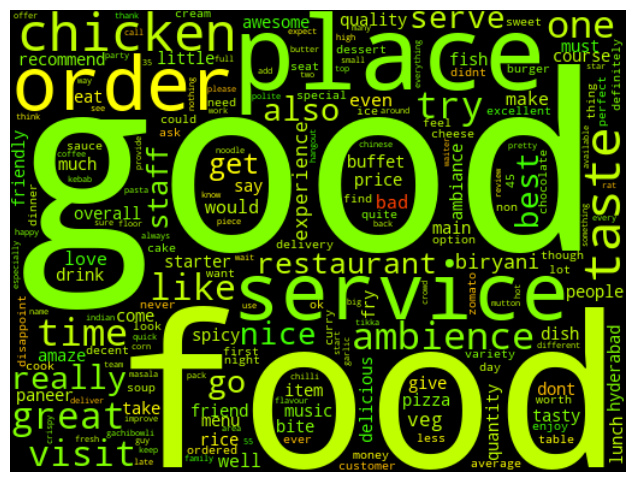

In [37]:
# Get word list
word_list = bow_ALLcorpus_unigram_result[1]

# Get frenquency of each word
matrix = bow_ALLcorpus_unigram_result[0]
word_counts = np.sum(matrix, axis=0).tolist()

# Get the average related rating to each word
ratings = np.array([corpus['Rating']]).T

# Binarization of the matrix: if n=0:0 else 1
matrix = (matrix != 0).astype(int)

# Average of the ratings of reviews where a word apears 
most_related_rating= [float(np.dot(vector,ratings) / sum(vector)) for vector in matrix.T]

# Round values to be ables to have only .5 multiples
most_related_rating_rounded = [round(rating * 2) / 2 for rating in most_related_rating]

# Join everything in a dataframe
word_counts_df = pd.DataFrame({"word":word_list, "frequency":word_counts, "most_related_rating":most_related_rating_rounded})
word_counts_df = word_counts_df.sort_values(by=["frequency"], ascending=False)

# Assign colors to words based on the most_related_rating"

rating_to_color = {
    1.0: '#ff0000',   # Strong red
    1.5: '#ff4000',   # Red-orange
    2.0: '#ff8000',   # Orange
    2.5: '#ffbf00',   # Orange-yellow
    3.0: '#ffff00',   # Yellow
    3.5: '#bfff00',   # Yellow-green
    4.0: '#80ff00',   # Light green
    4.5: '#40ff00',   # Medium green
    5.0: '#00ff00'    # Strong green
}

word_counts_df['color'] = word_counts_df['most_related_rating'].map(rating_to_color)

# Create a correspondence of colors to word groups
color_to_words = word_counts_df.groupby('color')['word'].apply(list).to_dict()

# Create the word cloud and update the colours
wc = WordCloud(collocations=False,
               background_color="black",
               width=512,
               height=384)

grouped_color_func = SimpleGroupedColorFunc(color_to_words,'grey')
wc.generate_from_frequencies(word_counts_df.set_index('word')['frequency'].to_dict())
wc.recolor(color_func=grouped_color_func)

# Display the WordCloud
plt.figure(figsize=(8, 6))  
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  
plt.show()  

Significant words such as 'food,' 'place,' 'good,' and 'service' highlight the central themes mentioned in the reviews, with a notable focus on customer experience and meal quality. The words distinguished by color reflect their association with average review ratings, ranging from red for negative sentiment to green for positive sentiment, providing deeper insight. For instance, words in vivid green, such as 'great,' 'chicken,' and 'amazing,' indicate positive sentiments and high ratings, while the absence of dominant red words underscores the overall positive trend in the reviews.

<font color='#BFD72F' size=5>3.2.2 Term Frequency-Inverse Document Frequency (TF-IDF)</font> <a class="anchor" id="p3-2-2"></a>

[Back to TOC](#toc)

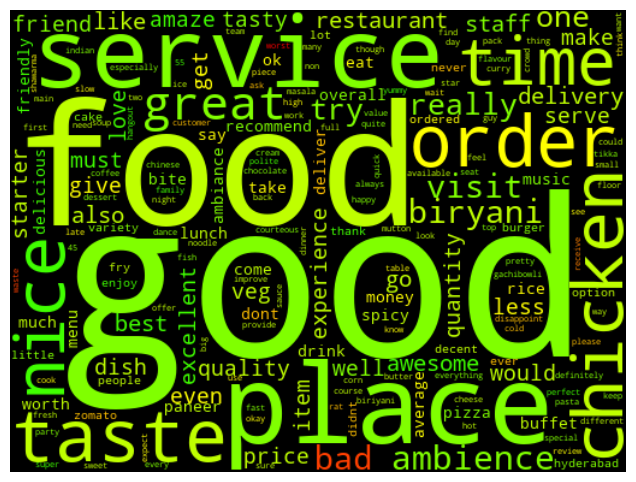

In [38]:
# Get word list
word_list = tfidf_ALLcorpus_unigram_result[1]

# Get frenquency of each word
matrix = tfidf_ALLcorpus_unigram_result[0]
word_counts = np.sum(matrix, axis=0).tolist()

# Get the average related rating to each word 
ratings = np.array([corpus['Rating']]).T

# Binarization of the matrix: if n=0:0 else 1
matrix = (matrix != 0).astype(int)

# Average of the ratings of reviews where a word apears 
most_related_rating= [float(np.dot(vector,ratings) / sum(vector)) for vector in matrix.T]

# Round values to be ables to have only .5 multiples
most_related_rating_rounded = [round(rating * 2) / 2 for rating in most_related_rating]

# Join everything in a dataframe
word_counts_df = pd.DataFrame({"word":word_list, "frequency":word_counts, "most_related_rating":most_related_rating_rounded})
word_counts_df = word_counts_df.sort_values(by=["frequency"], ascending=False)

# Assign colors to words based on the most_related_rating
rating_to_color = {
    1.0: '#ff0000',   # Strong red
    1.5: '#ff4000',   # Red-orange
    2.0: '#ff8000',   # Orange
    2.5: '#ffbf00',   # Orange-yellow
    3.0: '#ffff00',   # Yellow
    3.5: '#bfff00',   # Yellow-green
    4.0: '#80ff00',   # Light green
    4.5: '#40ff00',   # Medium green
    5.0: '#00ff00'    # Strong green
}

word_counts_df['color'] = word_counts_df['most_related_rating'].map(rating_to_color)

# Create a correspondence of colors to word groups
color_to_words = word_counts_df.groupby('color')['word'].apply(list).to_dict()

# Create the word cloud and update the colours
wc = WordCloud(collocations=False,
               background_color="black",
               width=512,
               height=384)

grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color= "grey")
wc.generate_from_frequencies(word_counts_df.set_index('word')['frequency'].to_dict())
wc.recolor(color_func=grouped_color_func)

# Display the WordCloud
plt.figure(figsize=(8, 6))
plt.imshow(wc, interpolation="bilinear") 
plt.axis("off") 
plt.show()

By analyzing the word cloud above, as in the previous case, keywords like 'good,' 'place,' 'food,' and 'service' are highly apparent, reflecting their significant relevance in customer reviews. Words distinguished by color correspond to their average associated rating, ranging from red for lower-rated sentiments to green for higher-rated sentiments. Positive sentiments dominate the visualization, with terms such as 'amazing,' 'excellent,' and 'taste' appearing in green shades, indicating their association with high ratings.

<font color='#BFD72F' size=6>3.4 Co-ocurrence Matrix</font> <a class="anchor" id="p3-4"></a>
  
[Back to TOC](#toc)

In [ ]:
# Tokenize the 'preproc_reviews' column and store the result in 'preproc_reviews_tokenized'
main_df['preproc_reviews_tokenized'] = main_df['preproc_reviews'].apply(lambda review: review.split())
# Converte the tokenized reviews into a list
list = main_df['preproc_reviews_tokenized'].tolist()

In [40]:
# Generate the co-occurrence matrix from the tokenized review list
matrix = pipeline_project.cooccurrence_matrix_sentence_generator(list)

100%|██████████| 9954/9954 [00:00<00:00, 13102.47it/s]


In [41]:
# Create a heatmap of the co-occurrence matrix for the top 30 words
fig = px.imshow(matrix.iloc[:30, :30], color_continuous_scale='YlGnBu', 
                labels=dict(x="Words", y="Words", color="Count"),  # The color scale represents the count of word co-occurrences
                title="Sentence Co-occurrence matrix (60 most frequent co-occurring words)", 
                width= 800, height= 800)

fig.show()

Considering the above co-occurrence matrix, each square in the heatmap represents the frequency with which two words appear together in the same sentence, with darker shades indicating higher co-occurrence counts. For instance, words such as 'good,' 'food,' and 'place' exhibit strong co-occurrence patterns, reflecting their frequent usage together in positive sentiments about meal experiences. The heatmap also reveals clusters of related terms, such as those associated with food quality — 'taste,' 'chicken,' 'biryani' — and service aspects — 'staff,' 'ambience.'

<font color='#BFD72F' size=6>4. General Data Preparation</font> <a class="anchor" id="p4"></a>
  
[Back to TOC](#toc)

In [42]:
# Access the first review in the 'Review' column
main_df["Review"][0]

'The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.'

In [43]:
# Access the first preprocessed review in the 'preproc_reviews' column
main_df["preproc_reviews"][0]

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen das really courteous helpful'

To provide context on the planned approach, the 'complete_df' dataframe will serve as the primary dataset for both clustering/co-occurrence analysis and multilabel classification, as it contains all the necessary reviews for these tasks. In clustering and co-occurrence analysis, certain dish names are less frequent, meaning not all reviews will include them. In multilabel classification, some labels have very limited data representation, and removing reviews would exacerbate this issue. Therefore, we will retain all reviews to ensure sufficient data availability for both analyses.

In [44]:
main_df.to_csv("Data/complete_df.csv")

Next, we will create new variables to capture the number of words and sentences in each review.

In [52]:
sent_tokenizer = PunktSentenceTokenizer()

# Count words in each review and store in 'number_of_words'
main_df["number_of_words"] = main_df["preproc_reviews"].map(lambda content : len(str(content)))

# Tokenize reviews into sentences and store in 'sentences'
main_df["sentences"] = main_df["Review"].map(lambda content : sent_tokenizer.tokenize(str(content)))

# Count sentences in each review and store in 'number_of_sentences'
main_df["number_of_sentences"] = main_df["sentences"].map(lambda content : len(content))

# Display summary statistics for numeric columns
main_df.describe()

,Rating,number_of_words,number_of_sentences
count,9954.000000,9954.000000,9954.000000
mean,3.600261,176.341772,4.067511
std,1.483573,212.807801,4.236297
min,1.000000,0.000000,1.000000
25%,3.000000,87.000000,1.000000
50%,4.000000,123.000000,3.000000
75%,5.000000,201.000000,5.000000
max,5.000000,3258.000000,66.000000


The summary statistics of the dataset reveal several important trends. As previously discussed in the 'Rating' column, our focus here is on the 'number_of_words' and 'number_of_sentences' columns. Reviews vary significantly in length, with an average of 182 words and 4.1 sentences, but the range is quite broad. While most reviews are relatively short, typically between 100 and 200 words, a few are exceptionally long, containing up to 3,394 words. Similarly, the number of sentences per review generally ranges from 1 to 5, though some reviews include as many as 66 sentences. This indicates that while most reviews are concise, there is substantial variance in their length and structure, with a notable overall tendency toward positive sentiment.

In [53]:
# Display the main_df
main_df

,Name,Review,Rating,Cuisines,preproc_reviews,preproc_reviews_tokenized,number_of_words,sentences,number_of_sentences
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"Chinese, Continental, Kebab, European, South I...",ambience good food quite good saturday lunch c...,"[ambience, good, food, quite, good, saturday, ...",154,"[The ambience was good, food was quite good .,...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"Chinese, Continental, Kebab, European, South I...",ambience good pleasant even service prompt foo...,"[ambience, good, pleasant, even, service, prom...",95,"[Ambience is too good for a pleasant evening.,...",5
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"Chinese, Continental, Kebab, European, South I...",must try great food great ambience thnx servic...,"[must, try, great, food, great, ambience, thnx...",135,"[A must try.. great food great ambience., Thnx...",3
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0,"Chinese, Continental, Kebab, European, South I...",soumen da arun great guy behavior sincerety go...,"[soumen, da, arun, great, guy, behavior, since...",83,"[Soumen das and Arun was a great guy., Only be...",2
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0,"Chinese, Continental, Kebab, European, South I...",food order kodi drumstick basket mutton biryan...,"[food, order, kodi, drumstick, basket, mutton,...",103,[Food is good.we ordered Kodi drumsticks and b...,6
...,...,...,...,...,...,...,...,...,...
9994,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3.0,"Chinese, Seafood",madhumathi mahajan well start nice courteous s...,"[madhumathi, mahajan, well, start, nice, court...",677,[Madhumathi Mahajan Well to start with nice co...,13
9995,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,"Chinese, Seafood",place never disappoint u food courteous staff ...,"[place, never, disappoint, u, food, courteous,...",221,[This place has never disappointed us.. The fo...,3
9996,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"Chinese, Seafood",bad rat mainly chicken bone find veg food acce...,"[bad, rat, mainly, chicken, bone, find, veg, f...",1002,"[Bad rating is mainly because of ""Chicken Bone...",10
9997,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4.0,"Chinese, Seafood",personally love prefer chinese food couple tim...,"[personally, love, prefer, chinese, food, coup...",278,"[I personally love and prefer Chinese Food., H...",7


#### **Reviews Lenght**

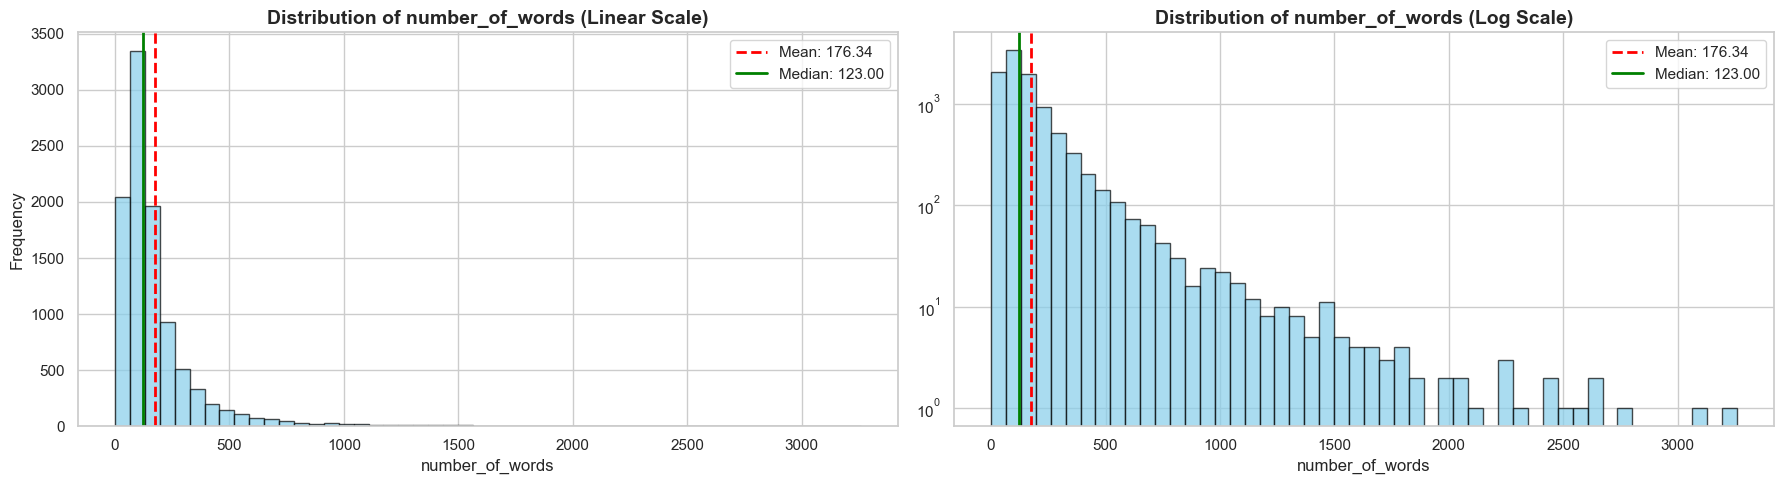

In [54]:
plotter_1(main_df, "number_of_words")

Both plots illustrate the distribution of the number of words per review, revealing that most reviews have a relatively low word count, though a few contain substantially higher counts. The mean number of words per review is 181.77, notably higher than the median of 126, due to the influence of outliers with exceptionally long word counts. Furthermore, the right plot provides a clearer view of the spread and frequency of large word counts, which are less discernible in the left plot.

**For Long Reviews**

In [55]:
# Calculate the 95th percentile
percentile_95 = np.percentile(main_df["number_of_words"], 95)
print(f"95th Percentile: {percentile_95}")

95th Percentile: 517.0


In [56]:
# Count reviews with more than 600 words
print(len(main_df["preproc_reviews"][main_df["number_of_words"] > 600]))

# Get the first review with more than 600 words
main_df["Review"][main_df["number_of_words"] > 600].iloc[0]

362


"Short review: Decent breads and starters, bad Shaam Savera, a little screwed up daal makhni (but should be a one-off case)\nBetter ambience at night... And importantly good quantity!\nI wanted to give a 2.5 but that's not an option 🙈\nExtensive...\nAmbience: It's better at night. Friends who had been here during the day didn't like it much. So if you prefer ambience, go at night!\nFood! Ordered a Hara Bhara Kebab, Shaam Savera, Daal Makhni, rotis and raita (Yes! I'm a vegetarian 🙈)\nThe good part! Quantity 😍\nI was excited to see Shaam Savera on their menu. But take it from me, you do not want to order it. It is no where close to what it should be. They messed it up real bad, especially the colors.\nThe daal makhni had big chunks of garlic cloves which spoiled it for me. It wasn't creamy too :(\nThe breads and raita were decent!\nThe Hara Bhara Kebabs were decent too, soft! They had an extra outer coating of peanuts. So if you're not a peanut fan on your kebabs, ask them to skip that 

Since the 95th percentile is 517, reviews containing more than 600 words will be removed. By reducing noise in the data, improved performance is anticipated for the sentiment analysis model.

In [58]:
# Filter the DataFrame to keep only reviews with 600 or fewer words
main_df = main_df[main_df["number_of_words"] <= 600]

<b> For Small Reviews

In [59]:
# Calculate the 5th percentile
percentile_5 = np.percentile(main_df["number_of_words"], 5)
print(f"5th Percentile: {percentile_5}")

5th Percentile: 4.0


In [60]:
# Print the count of reviews with fewer than 5 words
print(len(main_df["preproc_reviews"][main_df["number_of_words"] < 5]))

# Get reviews with fewer than 5 words
main_df["Review"][main_df["number_of_words"] < 5]

514


367     not good
534     Very bad
786         good
788         Nice
797         good
          ...   
9878        good
9879      v.good
9882        Good
9887        late
9893        good
Name: Review, Length: 514, dtype: object

Since most reviews with few words provide meaningful insights for the sentiment analysis model, they will be retained.

#### **Number of Sentences per Review**

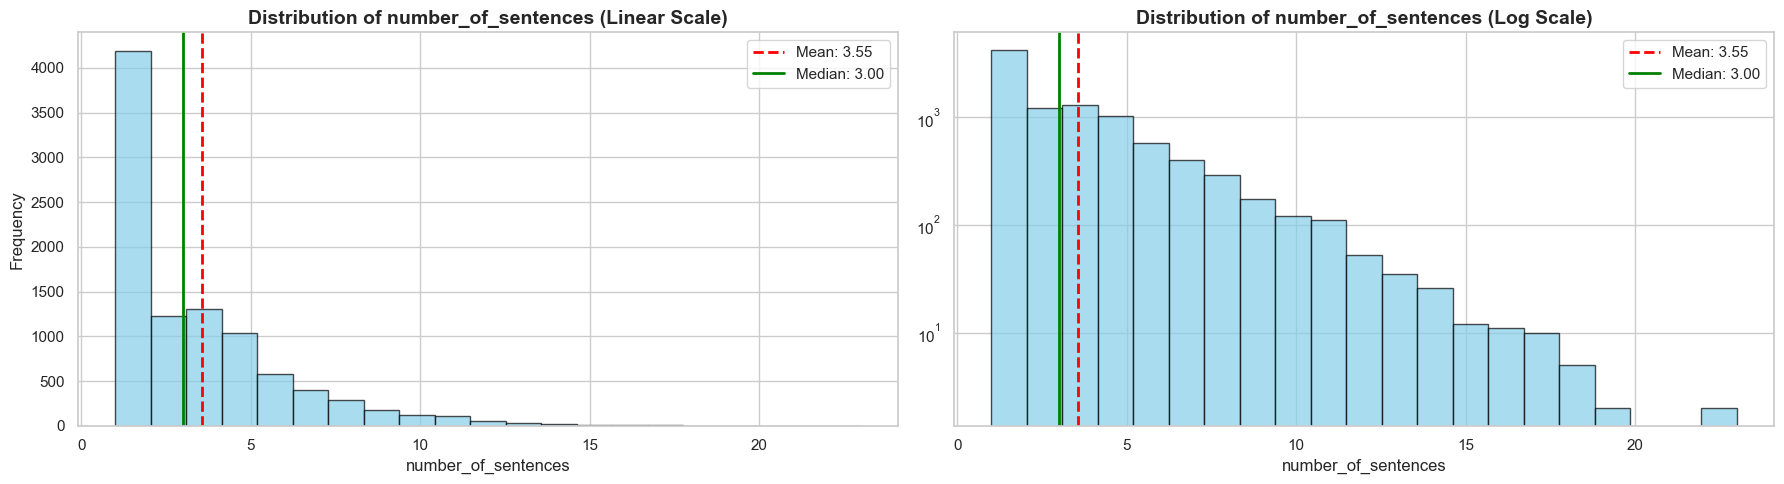

In [61]:
plotter_1(main_df, "number_of_sentences")

Similar to the previous distribution, the sentence count distribution is highly skewed to the right, indicating that most reviews contain a small number of sentences. The average number of sentences per review is 3.53, slightly higher than the median of 3.0, reflecting the influence of reviews with a greater number of sentences. This distribution highlights that the majority of reviews are concise, typically consisting of three or fewer sentences, with longer, more detailed reviews being less common.

In [62]:
# Calculate the 95th percentile
percentile_95 = np.percentile(main_df["number_of_sentences"], 95)
print(f"5th Percentile: {percentile_95}")

5th Percentile: 9.0


In [63]:
# Print count of reviews with more than 9 sentences
print(len(main_df["preproc_reviews"][main_df["number_of_sentences"] > 9]))

# Display the second review with more than 9 sentences
main_df["Review"][main_df["number_of_sentences"] > 9].iloc[1]

390


"We went for lunch buffet yesterday and took a chance after seeing some good and some average reviews in Zomato.\n\nThe spread in buffet is too less, just 3 veg and 3 non veg starters, 2 main course in veg and non veg, just one fried rice and chicken Biryani.\nDesserts are ice cream and jamun.\n\nThe taste was ok and not to expect too much. Little disappointing when starters are not hot.\n\nFish fry was decent, Schezwan chicken was ok.\nVeg spring rolls were too good.\nBig surprise for me is Onion rings as starters 🤣😂\n\nKadai ghost in main course was good but missing that masala flavour.\nChicken was ok. Biryani is average, egg fried rice was good.\n\nFor the money we pay, we expect some good food. They use much of colour in food item's.\n\nSuggestion to management is use less coating and less food colouring in starters.\n\nOverall experience is ok, but they can be much better for the amount you pay."

Similar to the approach used for review length, the 95th percentile was calculated, yielding a value of 9.0. Outliers can distort analysis and models, particularly in tasks such as sentiment analysis and topic modeling, as extremely long reviews may introduce noise and bias. Therefore, reviews with an excessively high number of sentences will be excluded from the analysis.

In [64]:
# Filter the DataFrame to include only reviews with 9 or fewer sentences
main_df = main_df[main_df["number_of_sentences"] <= 9]

In [65]:
main_df.to_csv("Data/shorten_df.csv")

<font color='#BFD72F' size=7>5. Conclusion</font> <a class="anchor" id="p5"></a>

[Back to TOC](#toc)

In conclusion, the 'complete_df' will be used for multilabel classification and clustering/co-occurrence analysis, while the 'shorten_df' will be used for sentiment analysis and topic modeling.